In [1]:
import pandas as pd
# from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.graph_objects as go

import datetime
import plotly.express as px
# import matplotlib.mlab as mlab
# from statistics import mean
# import pylab
import math
# import tweepy
# from botometer import Botometer
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="gianluca.nogara@gmail.com")
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import sys
sys.path.append('C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/notebook/tweet_utils')
import tweets_utils
import csv
import importlib
%autosave 3600

Autosaving every 3600 seconds


In [14]:
bot_tweets =  730483
bot_original = 310406
bot_retweets = 384562
bot_replies = 21153
bot_quotes = 15133
bot_values = [(bot_original/bot_tweets), (bot_retweets/bot_tweets), 
              (bot_replies/bot_tweets), (bot_quotes/bot_tweets)]

human_tweets = 312673
human_original = 35514
human_retweets = 198042
human_replies = 41230
human_quotes = 37887
human_values = [(human_original/human_tweets), (human_retweets/human_tweets), 
              (human_replies/human_tweets), (human_quotes/human_tweets)]

bad_tweets = 19159
bad_original = 13535
bad_retweets = 2834
bad_replies = 1622
bad_quotes = 1168
bad_values = [(bad_original/bad_tweets), (bad_retweets/bad_tweets), 
              (bad_replies/bad_tweets), (bad_quotes/bad_tweets)]


good_tweets = 750820
good_original = 146304
good_retweets = 287203
good_replies = 233374
good_quotes = 83939
good_values = [(good_original/good_tweets), (good_retweets/good_tweets), 
              (good_replies/good_tweets), (good_quotes/good_tweets)]

susp_tweets = 97562
susp_original = 24482
susp_retweets = 56138
susp_replies = 9272
susp_quotes = 7670
susp_values = [(susp_original/susp_tweets), (susp_retweets/susp_tweets), 
              (susp_replies/susp_tweets), (susp_quotes/susp_tweets)]

In [23]:
labels = ["Original", "Retweet", "Reply", "Quote"]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=bad_values, x=labels, name="Bad"))
fig.add_trace(go.Histogram(histfunc="sum", y=good_values, x=labels, name="Good"))
fig.add_trace(go.Histogram(histfunc="sum", y=human_values, x=labels, name="Human"))
fig.add_trace(go.Histogram(histfunc="sum", y=bot_values, x=labels, name="Bot"))
fig.add_trace(go.Histogram(histfunc="sum", y=susp_values, x=labels, name="Suspended"))

fig.update_layout(
    title="Differences between Users activity",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()

In [2]:
files_tweets = glob.glob("F:/Supsi/COVID-19-Tweets/*/tweets.csv")
files_users = glob.glob("F:/Supsi/COVID-19-Tweets/*/users.csv")

## Manage data

## Get info

In [3]:
cols_tweets = ['user_screen_name', "rt_user_screen_name", "rt_created_at"]
#     u'user_screen_name', 
#         u'rt_user_screen_name', u'rt_user_id', 
#         u'in_reply_to_screen_name', u'in_reply_to_user_id',
#         u'rt_created_at', u'in_reply_to_status_id'] 

cols_users = [u'id'] 

In [ ]:
def write_file(filename, serie_id, serie_user):
    filename = filename + ".csv"
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "screen_name"])
        for i in range(len(serie_id)):
            writer.writerow([serie_id.keys()[i], serie_user.keys()[i]])

In [ ]:
def list_series(list_id, flag):
    if(flag == True):
        for i in range(len(list_id)):
                list_id[i] = str(int(list_id[i]))
    list_id = pd.Series(list_id).value_counts().sort_values(ascending=False)[:int(2e4)]
    return list_id

In [ ]:
# def id_user(user, u_id=u_id):
#     for i in range(len(u_id)):
#         if(user == u_id[i][1]):
#             return u_id[i][0]
#     return -1

In [ ]:
# def check_verified(user, u_id=u_id):
#     for i in range(len(u_id)):
#         if(user == u_id[i][1]):
#             if(u_id[i][2] == True):
#                 return True
#     return False

In [4]:
# result = []
# importlib.reload(tweets_utils)
# start_time = time.perf_counter()
# j = 0
# df = pd.DataFrame()
# for filename in files_users:
#     print(f"Reading file: {filename}")
#     result.extend(tweets_utils.process_all_data(filename, cols_users, False))
#     lista = result[j]
#     j = j + 1
#     print(f"Mese numero {j}")
#     for i in range(len(lista)):
#         df = df.append(lista[i]["df"])
#         df = df.drop_duplicates(subset=["id"])
# stop_time = time.perf_counter()
# print("Time: ",stop_time-start_time)

In [14]:
good = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/all_good_users.csv",
                  lineterminator="\n")
lst = list(good["screen_name"])

In [15]:
gen = pd.DataFrame()
feb = pd.DataFrame()
mar = pd.DataFrame()
apr = pd.DataFrame()
mag = pd.DataFrame()
lista_df = [gen, feb, mar, apr, mag]
from tqdm.notebook import tqdm
cont = 0
for filename in files_tweets:
    print("Process ", filename)
    for i in tqdm(pd.read_csv(filename, usecols=["created_at", "hashtags"], lineterminator="\n",
                        low_memory=False, chunksize=int(1e6))):
        lista_df[cont] = lista_df[cont].append(i[i["hashtags"]!="[]"])
    cont = cont + 1

Process  F:/Supsi/COVID-19-Tweets\2020-01\tweets.csv


0it [00:00, ?it/s]

Process  F:/Supsi/COVID-19-Tweets\2020-02\tweets.csv


0it [00:00, ?it/s]

Process  F:/Supsi/COVID-19-Tweets\2020-03\tweets.csv


0it [00:00, ?it/s]

Process  F:/Supsi/COVID-19-Tweets\2020-04\tweets.csv


0it [00:00, ?it/s]

Process  F:/Supsi/COVID-19-Tweets\2020-05\tweets.csv


0it [00:00, ?it/s]

In [24]:
# lista_df = [gen, feb, mar, apr, mag]
cont = 0
lst = ["gen", "feb", "mar", "apr", "mag"]
for i in lista_df:
    path = f"C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/hashtags/{lst[cont]}.csv"
    cont = cont + 1
    i.to_csv(path, line_terminator="\n", encoding="utf-8", index=False)

In [15]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
users = []
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, lst))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        users.extend(lista[i]["user"])
    print(len(users))
#         users = list(set(users))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/Supsi/COVID-19-Tweets\2020-01\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Mese numero 1
24393
Reading file: F:/Supsi/COVID-19-Tweets\2020-02\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Mese numero 2
90145
Reading file: F:/Supsi/COVID-19-Tweets\2020-03\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Mese numero 3
198041
Reading file: F:/Supsi/COVID-19-Tweets\2020-04\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chu

In [21]:
pd.DataFrame(users, columns=["screen_name"]).to_csv("C:/Users/gianl/Desktop/Gi/rt_good.csv", line_terminator="\n", encoding="utf-8", index=False)

### Process distribution

In [8]:
print("process users_retweet")
users_retweet = pd.Series(users_retweet).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_retweeted")
users_retweeted = pd.Series(users_retweeted).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_original")
users_original = pd.Series(users_original).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_reply")
users_reply = pd.Series(users_reply).value_counts().sort_values(ascending=False)[:int(2e4)]
print("process users_replied")
users_replied = pd.Series(users_replied).value_counts().sort_values(ascending=False)[:int(2e4)]


process users_retweet
process users_retweeted
process users_original
process users_reply
process users_replied


In [31]:
lists = [users_retweet, users_retweeted, users_original, users_reply, users_replied]
str_lists = ["users_retweet", "users_retweeted", "users_original", "users_reply", "users_replied"]

In [33]:
for i in range(len(lists)):
    names = list(lists[i].keys())
    count = list(lists[i])
    frame = { 'Name': names, 'Count': count}
    df = pd.DataFrame(frame)
    path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/2k_tweets _count/")
    df.to_csv(path[0] + str_lists[i] + ".csv", index=False)

In [61]:
def visualize_distribution(df, string):
    index = [10, 25, 50, 75, 90]
    perc_numpy = [np.percentile(df["Count"], i, interpolation='nearest') for i in index]
    print(perc_numpy)
    fig = px.histogram(df["Count"], title=f"Distribution of {string} tweets")
    fig.show()  

In [62]:
def print_all_distributions():
    df = pd.read_csv(path[0] + "users_original.csv")
    visualize_distribution(df, "original")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_reply.csv")
    visualize_distribution(df, "reply")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_replied.csv")
    visualize_distribution(df, "replied")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_retweet.csv")
    visualize_distribution(df, "retweet")
    print("--------------------------------------------------------------------------------------")
    df = pd.read_csv(path[0] + "users_retweeted.csv")
    visualize_distribution(df, "retweeted")

In [64]:
print_all_distributions()

## Writing files

In [ ]:
ids_retweeted = list_series(ids_retweeted, True)
users_retweeted = list_series(users_retweeted, False)
write_file("prova_retweeted", ids_retweeted, users_retweeted)
del ids_retweeted
del users_retweeted

In [ ]:
ids_retweet = list_series(ids_retweet, True)
users_retweet = list_series(users_retweet, False)
write_file("prova_retweet", ids_retweet, users_retweet)
del ids_retweet
del users_retweet

In [ ]:
hasnan = lambda array: any(filter(math.isnan, ids_original))

In [ ]:
hasnan4(ids_original)

In [ ]:
index = []
for i in range(len(ids_original)):
    if(math.isnan(ids_original[i])):
        index.append(i)
del ids_original[index[0]:index[-1]]
del users_original[index[0]:index[-1]]

In [ ]:
index = 0
for i in range(len(ids_original)):
    if(math.isnan(ids_original[i])):
        index = i

In [ ]:
del ids_original[index]
del users_original[index]

In [ ]:
hasnan4(ids_original)

In [ ]:
ids_original = list_series(ids_original, True)
users_original = list_series(users_original, False)
write_file("prova_original", ids_original, users_original)
del ids_original
del users_original

In [ ]:
ids_replied = list_series(ids_replied, True)
users_replied = list_series(users_replied, False)
write_file("prova_replied", ids_replied, users_replied)
del ids_replied
del users_replied

In [ ]:
ids_reply = list_series(ids_reply, True)
users_reply = list_series(users_reply, False)
write_file("prova_reply", ids_reply, users_reply)
del ids_reply
del users_reply

## Stats

In [8]:
print(f'Number of total tweets: {total_tweets}')
print(f'Number of original tweets: {original_n}')
print(f'Number of retweet: {retweet_n}')
print(f'Number of reply: {reply_n}')

perc_original = np.around(original_n*100/total_tweets,2)
perc_retweet = np.around(retweet_n*100/total_tweets,2)
perc_reply = np.around(reply_n*100/total_tweets,2)
print(f'Number of original_tweets: {perc_original}% of total tweets')
print(f'Number of retweets: {perc_retweet}% of total tweets')
print(f'Number of replies: {perc_reply}% of total tweets')

print('Check sum == len(tweets): ',original_n + retweet_n + reply_n == total_tweets)

Number of total tweets: 66412411
Number of original tweets: 13999715
Number of retweet: 48312504
Number of reply: 4100192
Number of original_tweets: 21.08% of total tweets
Number of retweets: 72.75% of total tweets
Number of replies: 6.17% of total tweets
Check sum == len(tweets):  True


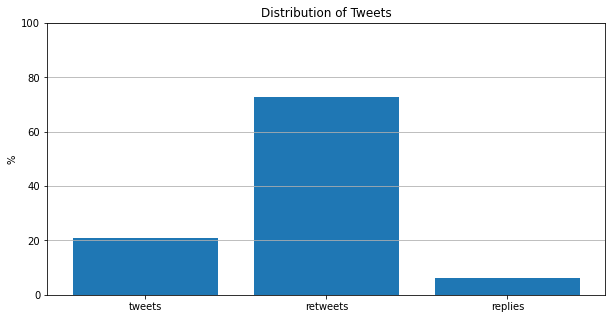

In [9]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.bar(np.arange(3), np.asarray([original_n, retweet_n, reply_n])*(100/total_tweets))
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['tweets', 'retweets', 'replies'])
ax.set_ylabel('%')
ax.yaxis.grid(True)
ax.set_ylim([0,100])
ax.set_title('Distribution of Tweets')
#plt.savefig('files/plots/tweets_division')
plt.show()

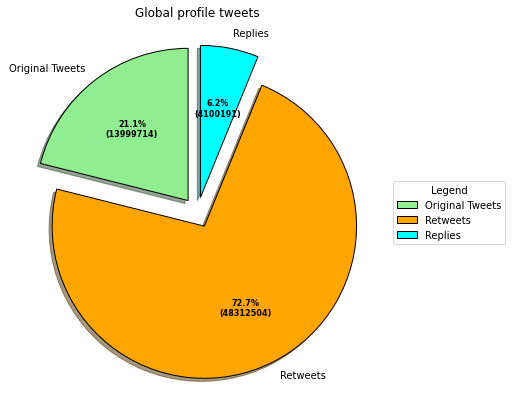

In [11]:
original = "Original Tweets"
retweet = "Retweets"
reply = "Replies"
label = [original, retweet, reply]
data = [original_n, retweet_n, reply_n]
explode = (0.1, 0.1, 0.1)
  
# Creating color parameters
colors = ( "lightgreen", "orange", "cyan")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
          
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp)
  
# Adding legend
ax.legend(wedges, label,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Global profile tweets")
plt.show()

## Top 30 - Original tweets

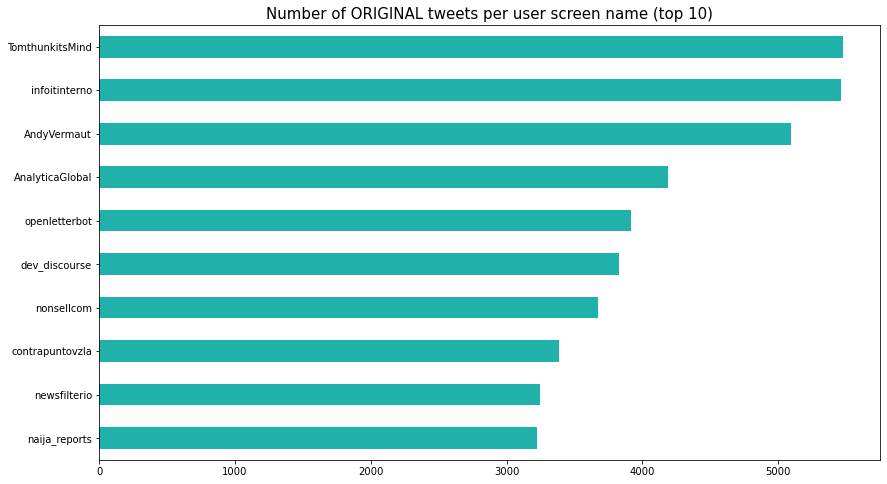

In [10]:
# val = pd.Series(users_original)
# val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:10].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

## Top 30 - Retweets

In [ ]:
val = pd.Series(users_retweet)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Number of RETWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

## Top 30 - Retweeted

In [ ]:
val = pd.Series(users_retweeted)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14)) #green #steelblue
ax.set_title('Top 30 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

## Top 30 - Replied

In [ ]:
val = pd.Series(users_replied)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

## Top 30 - Responsive

In [ ]:
val = pd.Series(users_reply)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14))  #red #darkturquoise
ax.set_title('Number of REPLIES per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

## Daily Tweets

In [ ]:
val = pd.Series(dates)
val = val.value_counts(sort=True) 
fig = plt.figure(figsize=(14, 8))
ax = val[:25].plot(kind='bar', color='green', fig=(14,14))
ax.set_title('Number of TWEETS per day', fontsize=15)
# ax.invert_yaxis()
ax.set_xticklabels(val.index.format(), rotation='vertical')
plt.show()

In [5]:
import plotly.graph_objects as go
total_ccdh = 22215
original_ccdh = 17632
rt_ccdh =  2932
rp_ccdh = 1651

original_n = 13999715 
retweet_n = 48312504 
reply_n = 4100192 
total_tweets = 13999715 + 48312504 + 4100192
list_ccdh = [original_ccdh/total_ccdh, rt_ccdh/total_ccdh, rp_ccdh/total_ccdh]
label_ccdh = ["Original", "Retweet", "Reply"]
list_verified = [original_n/total_tweets, retweet_n/total_tweets, reply_n/total_tweets]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=list_ccdh, x=label_ccdh, name="Disinform Dozen"))
fig.add_trace(go.Histogram(histfunc="sum", y=list_verified, x=label_ccdh, name="Global"))
fig.update_layout(
    title="Differences between Dozen and global activity",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()

# Check quotes

In [12]:
cols = ["id", "created_at", "user_id", "user_screen_name", "text", "in_reply_to_screen_name", "rt_created_at", "quoted_status_created_at", "quoted_user_id", "urls"] 

In [21]:
for chunk in pd.read_csv(files_tweets[0], 
                         chunksize=10000, 
                         lineterminator = '\n',
#                          usecols = cols
                        ):
    df = chunk
    break
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   id_str                     10000 non-null  int64  
 2   created_at                 10000 non-null  object 
 3   user_id                    10000 non-null  int64  
 4   user_screen_name           10000 non-null  object 
 5   user_verified              10000 non-null  bool   
 6   user_created_at            10000 non-null  object 
 7   text                       10000 non-null  object 
 8   source                     10000 non-null  object 
 9   coordinates                3 non-null      object 
 10  is_quote_status            10000 non-null  bool   
 11  retweet_count              10000 non-null  int64  
 12  favorite_count             10000 non-null  int64  
 13  favorited                  10000 non-null  bool

In [15]:
# df[(df["quoted_status_created_at"].notna()) & (df["in_reply_to_screen_name"].notna())]

In [29]:
x = df[df["rt_created_at"].notna()]
y = x[x["quoted_status_created_at"].notna()]
y

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_status_text,quoted_status_created_at,quoted_user_id,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media


In [16]:
result = []
len_rt = 0
checksum_rt = 0
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols, True))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):

        len_rt = len_rt + lista[i]["rt_len"] 
        checksum_rt = checksum_rt + lista[i]["quotes_rt_len"]

stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)
print(checksum_rt)
print(len_rt)

### Treshold

In [36]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/score_avaxtar/")
good = pd.read_csv(path[0] + "good_users.csv", lineterminator="\n")
good = good.drop(good[good.score == "Error"].index)
bad = pd.read_csv(path[0] + "bad_dozen.csv", lineterminator="\n") 
bad2 = pd.read_csv(path[0] + "novax_manual.csv", lineterminator="\n") 
bad = bad.append(bad2)
good["score"] = good["score"].astype("float")
good_lst = list(good["score"])
good = good.append(bad)
good = good.iloc[:120 ,:]
total = good.append(bad)

In [83]:
def threshold_calculate(threshold):
    true_negative = 0
    false_negative = 0
    false_positive = 0
    true_positive = 0
    lst_score = list(total["score"])
    lst_name = list(total["screen_name"])
    
    for i in range(len(total["score"])):
        if lst_score[i] > threshold:
            if lst_name[i] in list(bad["screen_name"]):
#                 print(f"{lst_name[i]}, {lst_score[i]}")
                true_negative = true_negative  + 1
            else:
                false_negative = false_negative + 1
        else:
            if lst_name[i] in list(bad["screen_name"]):
                false_positive = false_positive + 1
            else:
                true_positive = true_positive + 1
    totali = len(good["score"])
    check = (totali == true_negative + false_negative + false_positive + true_positive)
    print(f"Threshold: {threshold}")
    print(f"TN: {true_negative} + FN: {false_negative} + FP: {false_positive} + TP: {true_positive}")

    precision = round(true_positive/(true_positive + false_positive),2)
    print(f"Precision: {precision}")
    recall = round(true_positive/(true_positive + false_negative),2)
    print(f"Recall: {recall}")
    accuracy = round((true_positive + true_negative) / ( true_negative + false_negative + false_positive + true_positive),2)
    print(f"Accuracy: {accuracy}")
    f1 = round(2* ((precision*recall)/(precision+recall)),2)
    print(f"F1: {f1}")
    print(f"Sensitivity (TPR): {recall}")
    specificity = round(true_negative/(true_negative+false_positive),2)
    print(f"Specificity: {specificity}")
    fpr = round(1 - specificity,2)
    print(f"FPR: {fpr}")

    print(f"{(1-fpr)*100}% of negatives are correctly classified")
    print(f"{recall*100}% of positives are correctly classified")
    print("________________________________________________")
    return (specificity, recall)

In [84]:
xy = []
xy.append(threshold_calculate(0.55))
xy.append(threshold_calculate(0.6))
xy.append(threshold_calculate(0.65))
xy.append(threshold_calculate(0.7))
xy.append(threshold_calculate(0.75))
xy.append(threshold_calculate(0.8))
xy.append(threshold_calculate(0.85))
xy.append(threshold_calculate(0.9))

Threshold: 0.55
TN: 106 + FN: 22 + FP: 15 + TP: 98
Precision: 0.87
Recall: 0.82
Accuracy: 0.85
F1: 0.84
Sensitivity (TPR): 0.82
Specificity: 0.88
FPR: 0.12
88.0% of negatives are correctly classified
82.0% of positives are correctly classified
________________________________________________
Threshold: 0.6
TN: 106 + FN: 17 + FP: 15 + TP: 103
Precision: 0.87
Recall: 0.86
Accuracy: 0.87
F1: 0.86
Sensitivity (TPR): 0.86
Specificity: 0.88
FPR: 0.12
88.0% of negatives are correctly classified
86.0% of positives are correctly classified
________________________________________________
Threshold: 0.65
TN: 104 + FN: 17 + FP: 17 + TP: 103
Precision: 0.86
Recall: 0.86
Accuracy: 0.86
F1: 0.86
Sensitivity (TPR): 0.86
Specificity: 0.86
FPR: 0.14
86.0% of negatives are correctly classified
86.0% of positives are correctly classified
________________________________________________
Threshold: 0.7
TN: 103 + FN: 14 + FP: 18 + TP: 106
Precision: 0.85
Recall: 0.88
Accuracy: 0.87
F1: 0.86
Sensitivity (TPR

In [85]:
x = []
y = []
for i in xy:
    x.append(i[0])
    y.append(i[1])

#### Hashtags

In [28]:
paths = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/hashtags/*.csv")
x = pd.read_csv(paths[4], lineterminator="\n")
x.rename(columns={})

,created_at,hashtags
0,Thu May 07 11:08:19 +0000 2020,"[{'text': 'StayHome', 'indices': [22, 31]}, {'..."
1,Thu May 07 11:08:19 +0000 2020,"[{'text': 'UtiliseLockdownWisely', 'indices': ..."
2,Thu May 07 11:08:19 +0000 2020,"[{'text': 'Pologne', 'indices': [63, 71]}, {'t..."
3,Thu May 07 11:08:19 +0000 2020,"[{'text': 'transit', 'indices': [9, 17]}, {'te..."
4,Thu May 07 11:08:20 +0000 2020,"[{'text': 'apple', 'indices': [99, 105]}, {'te..."
...,...,...
5545732,Wed May 13 14:50:15 +0000 2020,"[{'text': 'AtmanirbharBharat', 'indices': [47,..."
5545733,Wed May 06 07:05:05 +0000 2020,"[{'text': 'HondurasQuedateEnCasa', 'indices': ..."
5545734,Mon May 11 07:51:02 +0000 2020,"[{'text': 'COVID19', 'indices': [90, 98]}, {'t..."
5545735,Fri May 15 19:35:13 +0000 2020,"[{'text': 'NoAnimalLeftBehind', 'indices': [13..."


In [62]:
from datetime import datetime
def get_series(hash_date, name):
    d = hash_date[hash_date["hashtag"]==name]["date"]
    dates_list = []
    for i in tqdm(list(d)):
        x = i.split()[0]
        if not "2" in x:
            x = tweets_utils.process_datetime(i)        
        dates_list.append(datetime.strptime(x, '%Y-%m-%d'))
    serie = pd.Series(dates_list, name=name).value_counts().sort_index()
    return serie

In [70]:
def plot_lines(hash_date, hashtags):
    x1 = get_series(hash_date, hashtags[0])
    x2 = get_series(hash_date, hashtags[1])
    x3 = get_series(hash_date, hashtags[2])
    x4 = get_series(hash_date, hashtags[3])
    x5 = get_series(hash_date, hashtags[4])
    df = pd.concat([x1, x2, x3, x4, x5], axis=1)
    df = df.fillna(0)
    df.sort_index(ascending=True, inplace=True)
    lines = df.plot.line(figsize=(14,6))
    lines.set_xlim([date(2020, 5, 1), date(2020, 6, 1)])

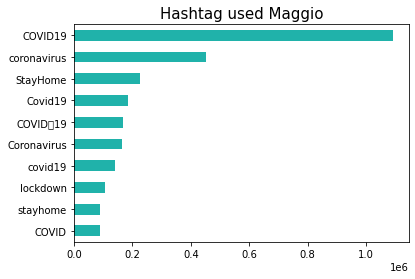

In [42]:
val = pd.Series(tweets_utils.hashtag_process(x))
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #red #darkturquoise
ax.set_title('Hashtag used Maggio', fontsize=15)
ax.invert_yaxis()
plt.show()

In [43]:
k = list(val.keys())
"Qanon" in k
"pizzagate"

True

In [54]:
importlib.reload(tweets_utils)
x = x.dropna()
hash_date = tweets_utils.hashtag_date(x)

0it [00:00, ?it/s]

  0%|          | 0/462 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

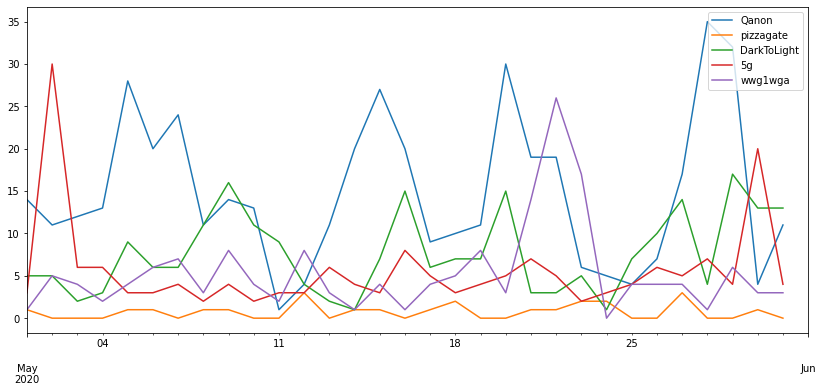

In [74]:
hashtags = ["Qanon", "pizzagate", "DarkToLight", "5g", "wwg1wga"]
plot_lines(hash_date, hashtags)

https://www.forbes.com/sites/thomasbrewster/2021/02/23/facebook-and-instagram-hashtag-crackdown-struggles-to-shut-down-covid-19-conspiracies/?sh=583dd557187b